In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
df=pd.read_csv("fashion-mnist_test.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.describe()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [13]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [15]:
x=df.drop(['label'],axis=1).values
y=df['label'].values

In [17]:
X_train , X_test , y_train , y_test = train_test_split( x , y , test_size=0.2)
#normalise
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape for CNN
X_train = X_train.reshape(-1 ,28 , 28 , 1)
X_test =  X_test.reshape(-1 ,28 , 28 , 1)

# one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
from tensorflow.keras.layers import Conv2D , Dense , MaxPooling2D , Dropout , Flatten

model= tf.keras.Sequential([
    Conv2D (32 , (3,3) , activation = 'relu' , input_shape=(28,28,1)),
    MaxPooling2D ((2,2)),
    Conv2D (64 , (3,3) , activation = 'relu'),
    MaxPooling2D ((2,2)),
    Conv2D (128 , (3,3) , activation = 'relu' ),
    MaxPooling2D ((2,2)),
    Flatten(),
    Dense(128 , activation='relu'),
    Dropout(0.5),
    Dense(10 , activation='softmax')

])



C:\Users\RUTURAJ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
history = model.fit(X_train , y_train , epochs=15 , validation_split=0.2 , batch_size=64)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3535 - loss: 1.7897 - val_accuracy: 0.7194 - val_loss: 0.7741
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6783 - loss: 0.8705 - val_accuracy: 0.7319 - val_loss: 0.7317
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7375 - loss: 0.7261 - val_accuracy: 0.7600 - val_loss: 0.6177
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7754 - loss: 0.6307 - val_accuracy: 0.7769 - val_loss: 0.5743
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7854 - loss: 0.5782 - val_accuracy: 0.7875 - val_loss: 0.5528
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7988 - loss: 0.5434 - val_accuracy: 0.7887 - val_loss: 0.5607
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8094 - loss: 0.5369 - val_accuracy: 0.7975 - val_loss: 0.5337
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8283 - loss: 0.4808 - val_accu

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8464 - loss: 0.3807
test acc 0.8429999947547913
test loss 0.42369386553764343


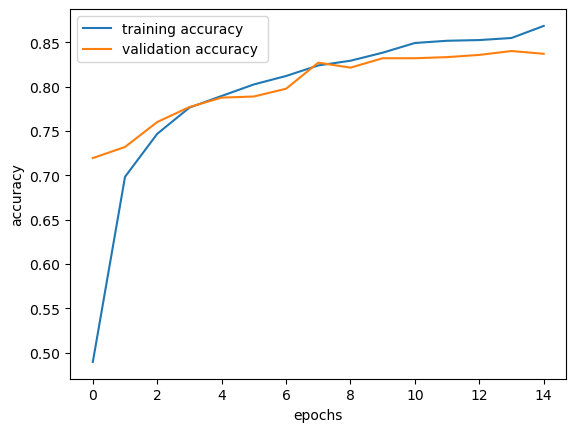

In [25]:
test_loss , test_acc = model.evaluate(X_test , y_test)
print("test acc" , test_acc)
print("test loss" , test_loss)

plt.plot(history.history["accuracy"] , label="training accuracy ")
plt.plot(history.history["val_accuracy"] , label="validation accuracy ")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()



In [27]:
model1= tf.keras.Sequential([
    Conv2D (32 , (3,3) , activation = 'relu' , input_shape=(28,28,1)),
    MaxPooling2D ((2,2)),
    Conv2D (64 , (3,3) , activation = 'relu'),
    MaxPooling2D ((2,2)),
    Flatten(),
    Dense(128 , activation='relu'),
    Dropout(0.5),
    Dense(10 , activation='softmax')

])

C:\Users\RUTURAJ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [31]:
history = model1.fit(X_train , y_train , epochs=10 , validation_split=0.2 , batch_size=64)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4556 - loss: 1.5211 - val_accuracy: 0.7644 - val_loss: 0.6589
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7469 - loss: 0.6974 - val_accuracy: 0.7844 - val_loss: 0.5436
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7841 - loss: 0.5978 - val_accuracy: 0.8188 - val_loss: 0.4810
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8032 - loss: 0.5214 - val_accuracy: 0.8394 - val_loss: 0.4528
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8081 - loss: 0.5125 - val_accuracy: 0.8356 - val_loss: 0.4318
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8419 - loss: 0.4479 - val_accuracy: 0.8537 - val_loss: 0.4131
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8420 - loss: 0.4276 - val_accuracy: 0.8587 - val_loss: 0.3963
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8564 - loss: 0.3880 - val_accu

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8799 - loss: 0.3195
test acc 0.8679999709129333
test loss 0.35786622762680054


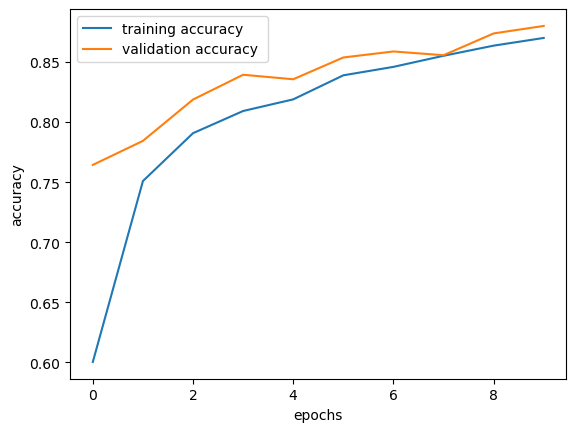

In [33]:
test_loss , test_acc = model1.evaluate(X_test , y_test)
print("test acc" , test_acc)
print("test loss" , test_loss)

plt.plot(history.history["accuracy"] , label="training accuracy ")
plt.plot(history.history["val_accuracy"] , label="validation accuracy ")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()



In [35]:
from sklearn.metrics import classification_report, confusion_matrix



# Fashion MNIST category labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert predictions and true labels from one-hot to class index
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.74      0.79       211
     Trouser       0.98      0.98      0.98       203
    Pullover       0.69      0.82      0.75       199
       Dress       0.91      0.89      0.90       211
        Coat       0.64      0.90      0.75       185
      Sandal       0.91      0.95      0.93       192
       Shirt       0.70      0.42      0.52       212
     Sneaker       0.91      0.89      0.90       184
         Bag       0.97      0.94      0.95       210
  Ankle boot       0.92      0.94      0.93       193

    accuracy                           0.84      2000
   macro avg       0.85      0.85      0.84      2000
weighted avg       0.85      0.84      0.84      2000

